# Lliurament tasca 6A: Visualització gràfica de Múltiples variables

# Descripció

Anem a practicar i a familiaritzar-nos amb la Visualització gràfica de Múltiples variables. 

- Exercici 1

  Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips". 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)

1. Carreguem el dataset "tips"

In [2]:
propines = sns.load_dataset("tips")

In [3]:
propines.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
print('La dimensió de la taula/conjunt de dades és {}, amb {} files i {} columnes'.format(propines.ndim,propines.shape[0],propines.shape[1]))
print('Llistat de columnes: \n{}'.format(propines.columns))
print('I el seu corresponent tipus: \n{}'.format(propines.dtypes))

La dimensió de la taula/conjunt de dades és 2, amb 244 files i 7 columnes
Llistat de columnes: 
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
I el seu corresponent tipus: 
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [5]:
# Creació d'una nova columa que representa el percentatge de propina versus el total pagat
# que anomenarem propina_pct
propines['propina_pct'] = round((propines['tip'] / (propines['total_bill'] - propines['tip']))*100, 2)
# Mostrar l'encapçalament del datasaet amb la nova columna
propines.head()

,total_bill,tip,sex,smoker,day,time,size,propina_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


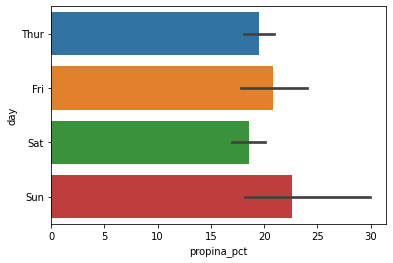

In [6]:
# Gráfic de barres horitzontal de percentage de propines versus dia de la setmana, amb desviació típica inclosa
sns.barplot(x='propina_pct', y='day', data=propines, orient="h")
plt.show()

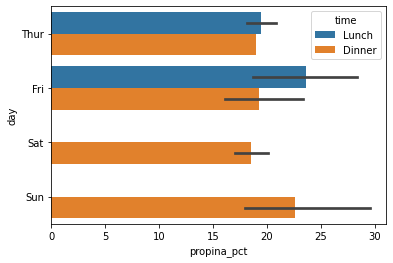

In [7]:
# Gráfic de barres horitzontal de percentage de propines versus dia de la setmana diferenciant dinars de sopars, amb desviació típica inclosa
sns.barplot(x='propina_pct', y='day', hue='time', data=propines, orient='h')
plt.show()
sns.set(style="darkgrid")

In [8]:
# Estadístics del dataset arrodonits a 2 decimals
propines.describe(include='all').round(2)

,total_bill,tip,sex,smoker,day,time,size,propina_pct
count,244.00,244.00,244,244,244,244,244.00,244.00
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.79,3.00,NaN,NaN,NaN,NaN,2.57,20.21
std,8.90,1.38,NaN,NaN,NaN,NaN,0.95,16.34
min,3.07,1.00,NaN,NaN,NaN,NaN,1.00,3.70
25%,13.35,2.00,NaN,NaN,NaN,NaN,2.00,14.83
50%,17.80,2.90,NaN,NaN,NaN,NaN,2.00,18.31
75%,24.13,3.56,NaN,NaN,NaN,NaN,3.00,23.68


In [9]:
# Estadístics del dataset arrodonits a 2 decimals
propines.isnull().sum()/len(propines)

total_bill     0.0
tip            0.0
sex            0.0
smoker         0.0
day            0.0
time           0.0
size           0.0
propina_pct    0.0
dtype: float64

In [10]:
# Estadístics de la columna tips (propines)
print(round((propines['tip']).describe(), 3))
print("med\t   {}".format((propines['tip']).median()))

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64
med	   2.9


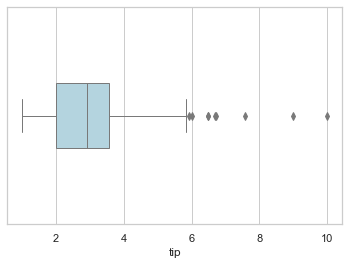

In [11]:
# Boxplot de la columna tips
sns.set(style="whitegrid")
ax = sns.boxplot(x = propines['tip'], color='lightblue', fliersize=5, linewidth=1, width=0.3)

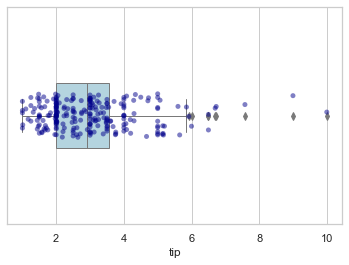

In [12]:
# Boxplot de la columna tips amb superposició de gráfic de punts 
ax = sns.boxplot(x="tip", data=propines,  color='lightblue', fliersize=5,  orient='h', linewidth=1 , width=0.3)
ax = sns.stripplot(x=propines["tip"], orient='h', color='darkblue', alpha= 0.5)

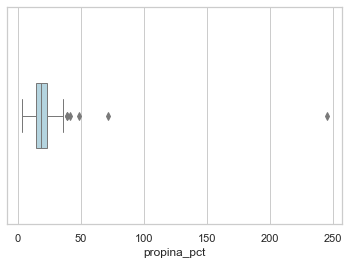

In [13]:
# Boxplot de la columna propina_pct
sns.boxplot(x="propina_pct", data=propines[propines.tip<10],color='lightblue',fliersize=5,linewidth=1,width=0.3);

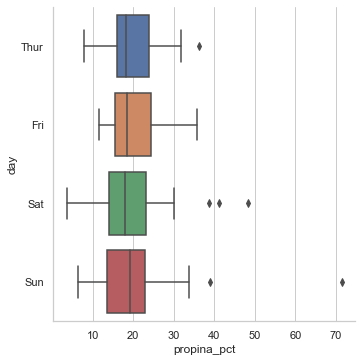

In [14]:
# Boxplot de la columna propina_pct per dia de la setmana
ax = sns.catplot(y='day', x='propina_pct', kind='box',data=propines[propines.propina_pct < 100]);

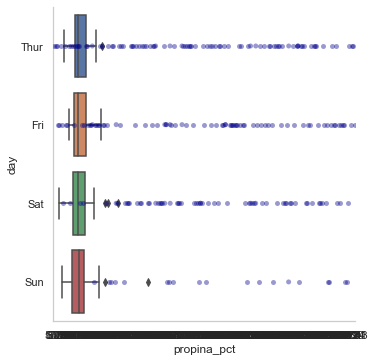

In [15]:
# Boxplot de la columna propina_pct per dia de la setmana
ax=sns.catplot(y='day',x='propina_pct',kind='box',data=propines[propines.propina_pct < 100]);
ax=sns.stripplot(y='day',x='propina_pct',data=propines[propines.propina_pct<100],orient='v',color='darkblue',alpha= 0.4);

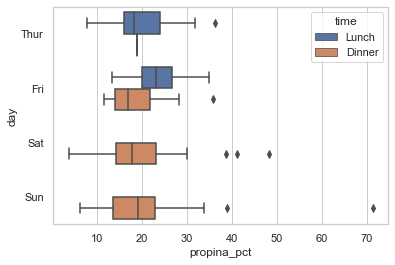

In [16]:
# Boxplot de la columna propina_pct per dia de la setmana diferenciant dinar de sopar
sns.boxplot(y='day',x='propina_pct',hue='time',data=propines[propines.propina_pct<100]);

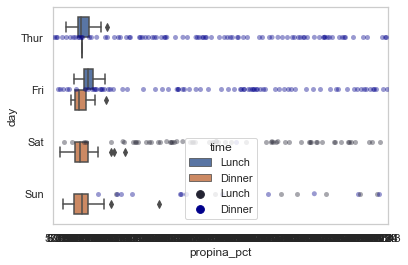

In [17]:
# Boxplot de la columna propina_pct per dia de la setmana diferenciant dinar de sopar amb l'afegit del gráfic de punts
sns.boxplot(y='day',x='propina_pct',hue='time',data=propines[propines.propina_pct<100]);
ax=sns.stripplot(y='day',x='propina_pct',hue='time',data=propines[propines.propina_pct<100],orient='v',color='darkblue',alpha=0.4);

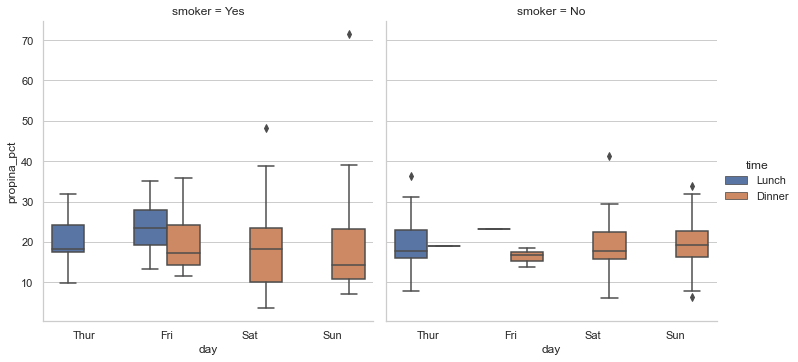

In [18]:
# Boxplot de la columna propina_pct per dia de la setmana diferenciant dinar de sopar i si es fumador o no
sns.catplot(x='day', y='propina_pct',hue='time',col='smoker',kind='box',data=propines[propines.propina_pct<100]);

- Exercici 2

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat 

In [19]:
# Carregar el dataset 'movies.dat'
columnes = ['pelicula_id','titol','generes']
pelicules= pd.read_csv('H:/_vertex/_formacio/_python - cibernarium/_04/_04_09/Data-Science-main/Pre-processing-data/movies.dat',sep='::',index_col=0,header=None,names=columnes,engine="python")
pelicules.head(5)

,titol,generes
pelicula_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [20]:
# Detectar l'any i ficar-lo en una nova columna anomenada titol
pelicules["any"]=[re.search("[\d]{4}",j).group() for j in [re.search("\([\d]{4}\)",i).group() for i in pelicules["titol"]]]
pelicules.head(5)

,titol,generes,any
pelicula_id,,,
1,Toy Story (1995),Animation|Children's|Comedy,1995
2,Jumanji (1995),Adventure|Children's|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [21]:
# Eliminar l'any de la columna titol
pelicules["titol"] = [re.split("\([\d]{4}", k)[0] for k in pelicules["titol"]]
pelicules.head(5)

,titol,generes,any
pelicula_id,,,
1,Toy Story,Animation|Children's|Comedy,1995
2,Jumanji,Adventure|Children's|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama,1995
5,Father of the Bride Part II,Comedy,1995


In [22]:
# Generar noves columnes amb els diferents generes per tal de tenir la info desagregada
generes = pelicules["generes"].str.get_dummies(sep="|")

# Llista de generes existents definits
print('Llista de géneres:\n')
for genere in pelicules.columns[3:]:
    print(genere)

# Generar dummies
display(generes.head(5))

Llista de géneres:



,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
pelicula_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Afegir les noves columnes de generes al dataframe de pelicules
pelicules = pelicules.join(generes,lsuffix="")
pelicules.head(5)

,titol,generes,any,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
pelicula_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,Animation|Children's|Comedy,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji,Adventure|Children's|Fantasy,1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale,Comedy|Drama,1995,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II,Comedy,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Generar columna (genere_count) com sumatori del nombre total de generes que abarca cada pelicula
columnes_a_sumar = pelicules.columns[:pelicules.shape[1]]
pelicules["generes_count"]= pelicules[columnes_a_sumar].sum(axis=1)
pelicules.head(5)

,titol,generes,any,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,generes_count
pelicula_id,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,Animation|Children's|Comedy,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,Jumanji,Adventure|Children's|Fantasy,1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2
4,Waiting to Exhale,Comedy|Drama,1995,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,Father of the Bride Part II,Comedy,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
# Agregar pelicules per any
pelicules_x_any=pelicules[['titol','any']].groupby("any").count()
pelicules_x_any.head(10)

,titol
any,
1919,3
1920,2
1921,1
1922,2
1923,3
1925,6
1926,8
1927,6
1928,3


In [26]:
pelicules_x_any.tail(10)

,titol
any,
1991,60
1992,102
1993,165
1994,257
1995,342
1996,345
1997,315
1998,337
1999,283


<AxesSubplot:xlabel='any'>

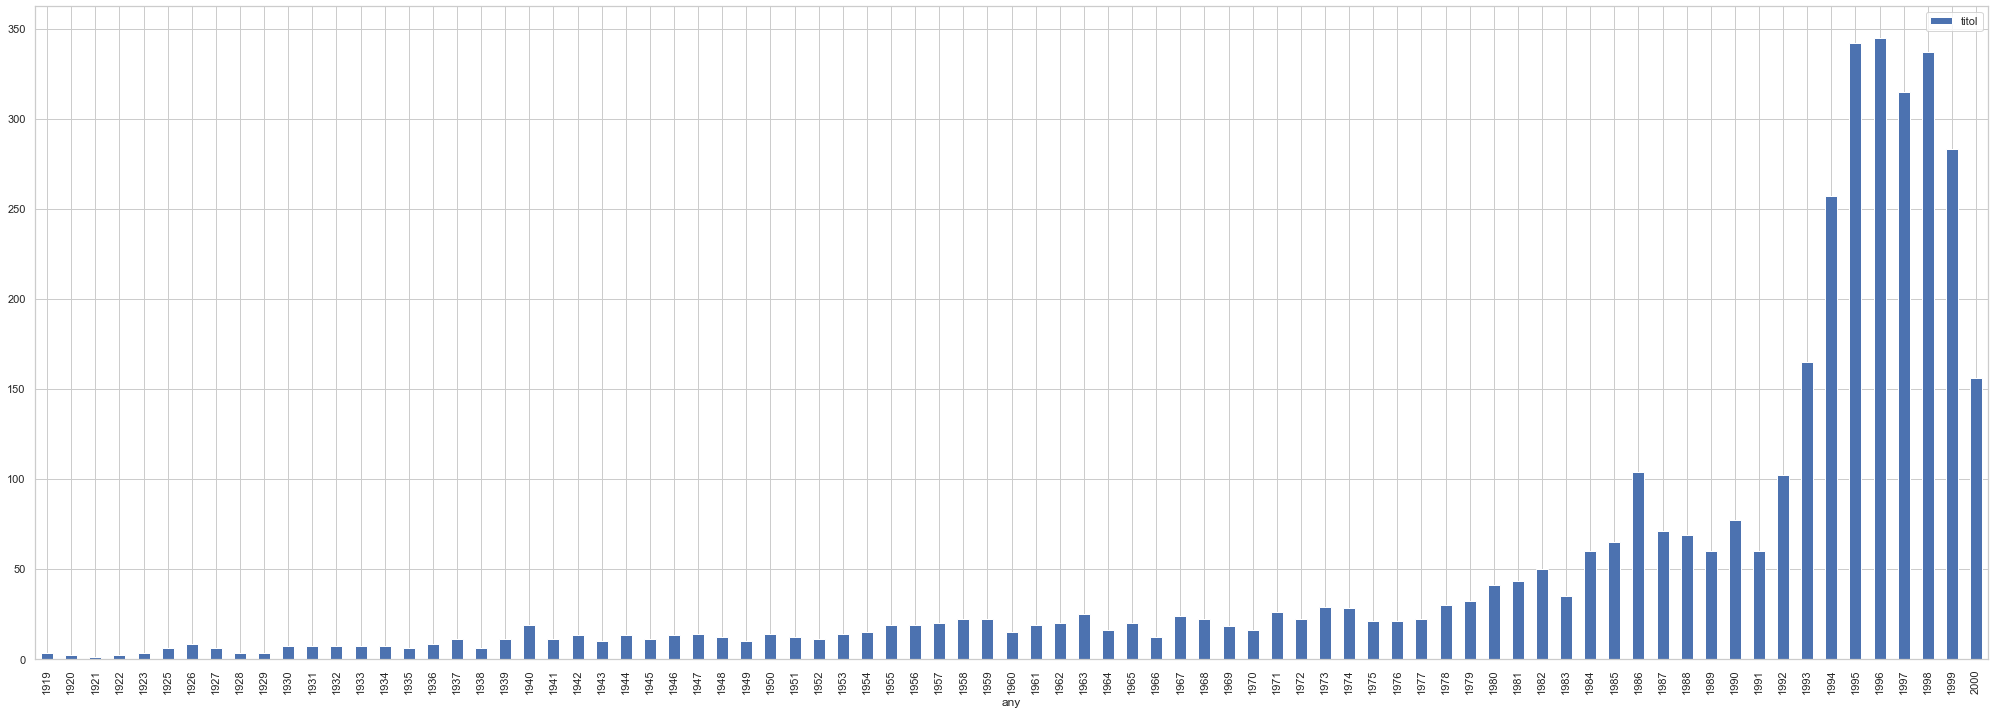

In [27]:
# Gràfic de pelicules pelicules per any
pelicules_x_any.plot(y=["titol"],kind="bar",figsize=(35,12))

- Exercici 3

Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.

In [28]:
# Agregar pelicules per any i genere
pelicules_x_any_genere=pelicules.groupby('any').sum()
pelicules_x_any_genere.head(10)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,generes_count
any,,,,,,,,,,,,,,,,,,,
1919,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,5
1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1922,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2
1923,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,3
1925,0,0,0,0,3,0,0,3,0,0,0,0,0,0,0,0,1,0,7
1926,0,1,0,0,1,1,0,4,0,0,0,0,0,0,1,1,0,0,9
1927,0,0,0,0,2,0,0,4,0,0,0,0,0,2,0,0,1,0,9
1928,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [29]:
# Taula transposada
pelicules_x_any_genere['titols']=pelicules.groupby("any").count()['titol']
pelicules_x_any_genere.head(10)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,generes_count,titols
any,,,,,,,,,,,,,,,,,,,,
1919,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,5,3
1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1922,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,2
1923,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3
1925,0,0,0,0,3,0,0,3,0,0,0,0,0,0,0,0,1,0,7,6
1926,0,1,0,0,1,1,0,4,0,0,0,0,0,0,1,1,0,0,9,8
1927,0,0,0,0,2,0,0,4,0,0,0,0,0,2,0,0,1,0,9,6
1928,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3


In [30]:
pelicules_x_any_genere_transp=pelicules_x_any_genere.T
display(pelicules_x_any_genere_transp)
pelicules_x_any_genere_transp.head(10)

any,1919,1920,1921,1922,1923,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
Action,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2,1,2,2,0,0,0,2,1,0,1,4,1,2,2,1,1,1,4,2,4,4,5,8,1,4,3,4,6,5,12,7,4,11,11,21,17,13,9,19,6,21,25,32,45,37,43,44,27,19
Adventure,1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,1,2,1,0,0,1,0,0,1,1,1,1,0,2,3,0,2,0,2,0,2,2,1,1,4,3,0,0,1,2,1,3,0,2,3,0,4,2,3,7,2,3,6,7,4,2,8,13,13,8,9,8,6,4,3,10,15,25,22,22,16,7,6
Animation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,1,1,0,1,2,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,2,0,1,0,0,3,0,0,0,2,2,0,0,3,2,0,0,1,3,0,3,2,2,2,3,4,5,8,7,6,8,7,8
Children's,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,1,1,1,0,1,2,1,1,2,2,1,0,1,1,1,0,1,0,3,3,4,2,3,1,1,0,3,2,1,2,4,0,2,2,2,1,6,4,2,1,3,3,1,2,6,7,2,1,5,4,3,7,12,20,22,20,22,18,11,9
Comedy,1,2,0,0,2,3,1,2,3,0,1,2,2,2,4,2,2,3,3,2,6,3,4,2,2,1,0,2,2,0,3,0,2,2,2,3,1,6,3,3,3,3,0,7,4,6,1,10,3,4,6,7,3,5,7,6,5,7,7,10,13,9,12,14,17,22,37,29,23,24,22,24,37,47,96,89,115,98,112,103,69
Crime,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,2,0,1,2,2,1,1,0,1,0,2,0,1,0,1,1,1,0,0,1,0,0,0,1,2,1,2,2,3,6,1,2,0,0,1,0,1,3,1,0,2,0,3,5,2,4,7,1,10,8,9,18,23,26,25,12,8
Documentary,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,3,2,2,1,1,5,11,22,19,11,18,15,8
Drama,2,0,0,1,1,3,4,4,0,1,3,2,2,1,1,0,2,6,2,7,4,4,5,3,2,5,6,4,5,6,3,5,5,6,5,8,6,8,8,8,7,11,8,7,4,6,5,9,8,4,6,9,6,11,9,9,8,4,10,12,18,14,21,11,23,22,38,21,20,23,27,26,38,81,121,158,150,139,166,130,55
Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,2,3,0,4,6,2,2,4,1,2,3,1,3,5,4,5,6,2,2,1
Film-Noir,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,4,0,3,4,4,0,2,1,0,1,0,2,2,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,2,2,3,0,0


any,1919,1920,1921,1922,1923,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
Action,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2,1,2,2,0,0,0,2,1,0,1,4,1,2,2,1,1,1,4,2,4,4,5,8,1,4,3,4,6,5,12,7,4,11,11,21,17,13,9,19,6,21,25,32,45,37,43,44,27,19
Adventure,1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,1,2,1,0,0,1,0,0,1,1,1,1,0,2,3,0,2,0,2,0,2,2,1,1,4,3,0,0,1,2,1,3,0,2,3,0,4,2,3,7,2,3,6,7,4,2,8,13,13,8,9,8,6,4,3,10,15,25,22,22,16,7,6
Animation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,1,1,0,1,2,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,2,0,1,0,0,3,0,0,0,2,2,0,0,3,2,0,0,1,3,0,3,2,2,2,3,4,5,8,7,6,8,7,8
Children's,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,3,1,1,1,0,1,2,1,1,2,2,1,0,1,1,1,0,1,0,3,3,4,2,3,1,1,0,3,2,1,2,4,0,2,2,2,1,6,4,2,1,3,3,1,2,6,7,2,1,5,4,3,7,12,20,22,20,22,18,11,9
Comedy,1,2,0,0,2,3,1,2,3,0,1,2,2,2,4,2,2,3,3,2,6,3,4,2,2,1,0,2,2,0,3,0,2,2,2,3,1,6,3,3,3,3,0,7,4,6,1,10,3,4,6,7,3,5,7,6,5,7,7,10,13,9,12,14,17,22,37,29,23,24,22,24,37,47,96,89,115,98,112,103,69
Crime,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,2,0,1,2,2,1,1,0,1,0,2,0,1,0,1,1,1,0,0,1,0,0,0,1,2,1,2,2,3,6,1,2,0,0,1,0,1,3,1,0,2,0,3,5,2,4,7,1,10,8,9,18,23,26,25,12,8
Documentary,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,3,2,2,1,1,5,11,22,19,11,18,15,8
Drama,2,0,0,1,1,3,4,4,0,1,3,2,2,1,1,0,2,6,2,7,4,4,5,3,2,5,6,4,5,6,3,5,5,6,5,8,6,8,8,8,7,11,8,7,4,6,5,9,8,4,6,9,6,11,9,9,8,4,10,12,18,14,21,11,23,22,38,21,20,23,27,26,38,81,121,158,150,139,166,130,55
Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,2,3,0,4,6,2,2,4,1,2,3,1,3,5,4,5,6,2,2,1
Film-Noir,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,4,0,3,4,4,0,2,1,0,1,0,2,2,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,2,2,3,0,0


(70.0, 90.0)

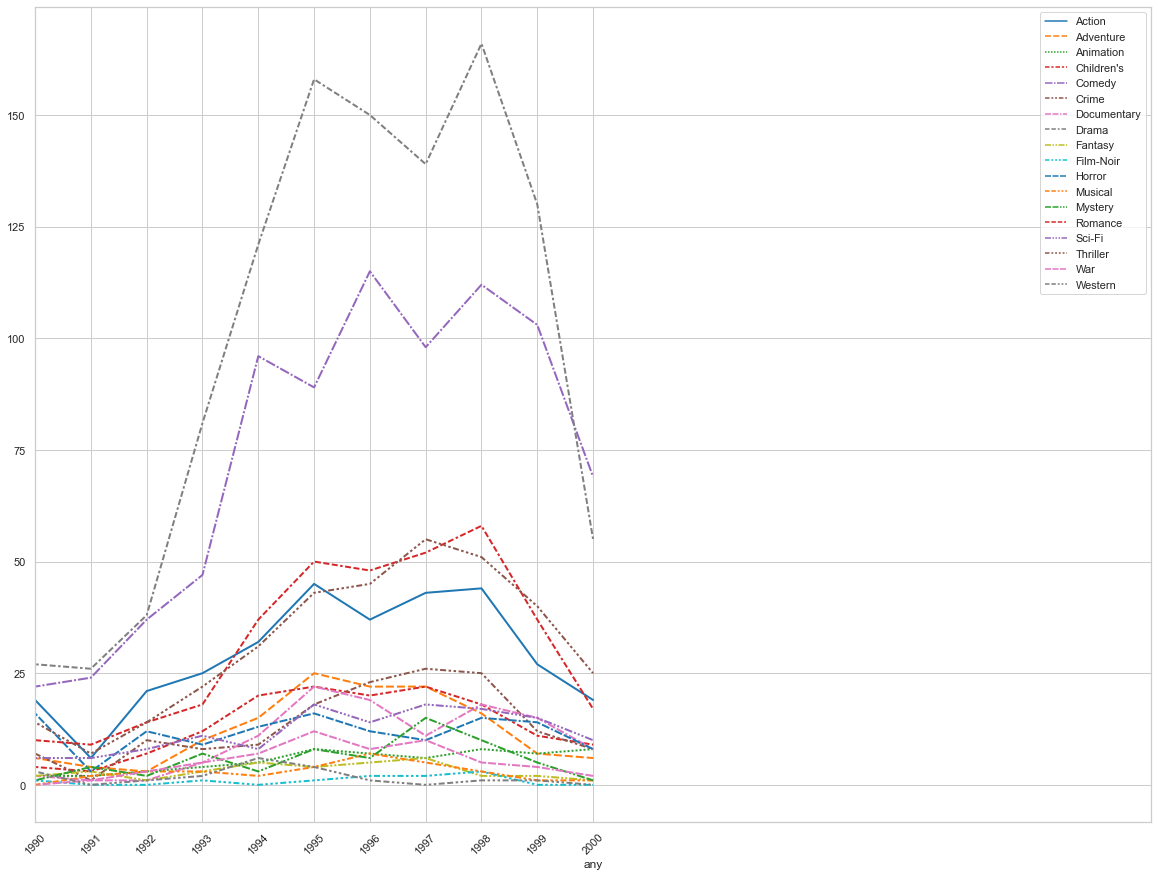

In [31]:
pelicules_x_any_genere_sense_totals=pelicules_x_any_genere.drop(columns=['generes_count','titols'])
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1,1, figsize = (20,15))
sns.lineplot(data=pelicules_x_any_genere_sense_totals,palette="tab10",linewidth=2)
plt.xticks(rotation=45)
plt.xlim(70,90)